In [1]:
import pandas as pd
d = pd.read_csv("erpData.csv",delimiter=",")
d

,subject,PO8,time,bsl,stimulus,condition
0,1,5.779323e-06,0.149414,-3.289448e-23,car,intact
1,1,8.570455e-06,0.117188,-1.315779e-22,face,intact
2,1,5.397788e-06,0.142578,-1.233543e-23,car,scrambled
3,1,6.282871e-06,0.125977,-1.644724e-22,face,scrambled
4,2,9.054158e-06,0.139648,8.223621e-23,car,intact
...,...,...,...,...,...,...
155,39,1.017349e-05,0.150391,6.578897e-23,face,scrambled
156,40,-7.867263e-07,0.125000,6.578897e-23,car,intact
157,40,-4.467147e-06,0.144531,2.467086e-23,face,intact
158,40,2.213958e-06,0.124023,-1.973669e-22,car,scrambled


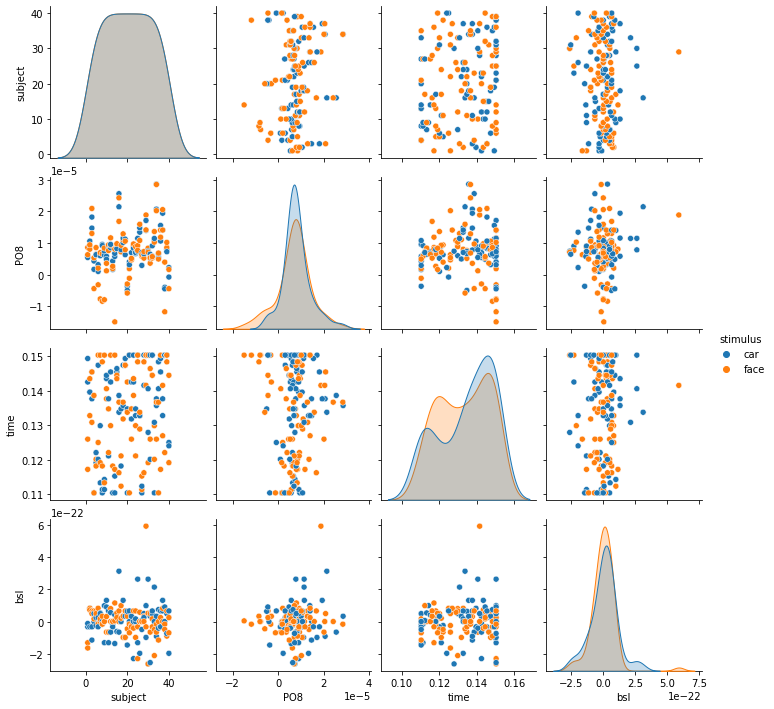

In [2]:
import seaborn as sns

sns.pairplot(d, hue='stimulus')

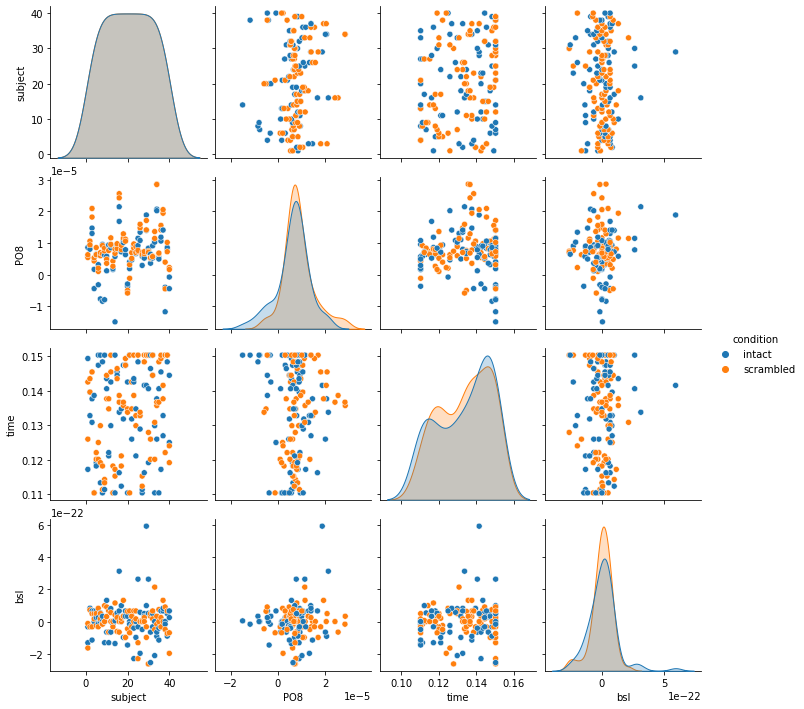

In [3]:
sns.pairplot(d, hue='condition')

In [4]:
import numpy as np
def solve(*args):
    # generate designmatrix by stacking
    X = np.stack(args).T
    Y = d.PO8.values
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)

In [5]:
ones = np.ones(d.shape[0])

solve(ones)

array([7.56605119e-06])

In [6]:
cond = np.array([1.0 if val == 'intact' else 0.0 for val in d.condition.values])

cond

array([1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0.])

In [7]:
solve(ones, cond)

array([ 8.79398571e-06, -2.45586904e-06])

In [8]:
stim = np.array([1. if val == 'face' else 0. for val in d.stimulus.values])

solve(ones, cond, stim)

array([ 9.32209167e-06, -2.45586904e-06, -1.05621192e-06])

In [9]:
interaction = stim * cond 
interaction

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0.])

In [10]:
tbtmodel = solve(ones, cond, stim, interaction)

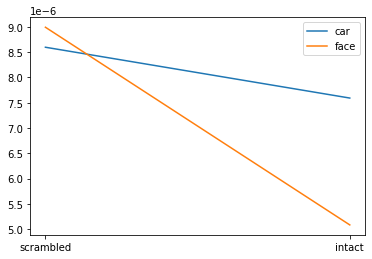

In [11]:
def plt_corr(tbtmodel):
    scrambled_cars = tbtmodel[0]
    intact_cars = tbtmodel[0]+tbtmodel[1]
    scrambled_faces = tbtmodel[0]+tbtmodel[2]
    intact_faces = tbtmodel[0]+tbtmodel[1]+tbtmodel[2]+tbtmodel[3]

    y = np.array([scrambled_cars, intact_cars, scrambled_faces, intact_faces])
    x_conditions = ['scrambled', 'intact','scrambled','intact']
    hue_stimuli = ['car','car','face','face']
    sns.lineplot(x=x_conditions, y=y, hue=hue_stimuli)
plt_corr(tbtmodel)

In [12]:
cond - 0.5

array([ 0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5,
       -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5,
       -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,
        0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,
        0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5,
       -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5,
       -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,
        0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,
        0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5,
       -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5,
       -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,
        0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,
        0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0.5,
       -0.5,  0.5,  0.5, -0.5, -0.5,  0.5,  0.5, -0

In [13]:
print(solve(ones, cond))
print(solve(ones, cond-0.5))

print(solve(ones, cond-0.5, stim-0.5, (stim-0.5) * (cond-0.5)))
print(solve(ones, cond, stim, interaction))

[ 8.79398571e-06 -2.45586904e-06]
[ 7.56605119e-06 -2.45586904e-06]
[ 7.56605119e-06 -2.45586904e-06 -1.05621192e-06 -2.90287999e-06]
[ 8.59637167e-06 -1.00442904e-06  3.95228075e-07 -2.90287999e-06]


In [14]:
d

,subject,PO8,time,bsl,stimulus,condition
0,1,5.779323e-06,0.149414,-3.289448e-23,car,intact
1,1,8.570455e-06,0.117188,-1.315779e-22,face,intact
2,1,5.397788e-06,0.142578,-1.233543e-23,car,scrambled
3,1,6.282871e-06,0.125977,-1.644724e-22,face,scrambled
4,2,9.054158e-06,0.139648,8.223621e-23,car,intact
...,...,...,...,...,...,...
155,39,1.017349e-05,0.150391,6.578897e-23,face,scrambled
156,40,-7.867263e-07,0.125000,6.578897e-23,car,intact
157,40,-4.467147e-06,0.144531,2.467086e-23,face,intact
158,40,2.213958e-06,0.124023,-1.973669e-22,car,scrambled


<AxesSubplot:xlabel='bsl', ylabel='PO8'>

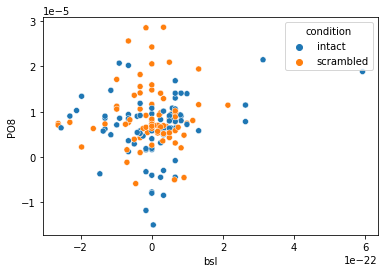

In [15]:
sns.scatterplot(x=d.bsl,y=d.PO8,hue=d.condition)

<AxesSubplot:xlabel='bsl', ylabel='PO8'>

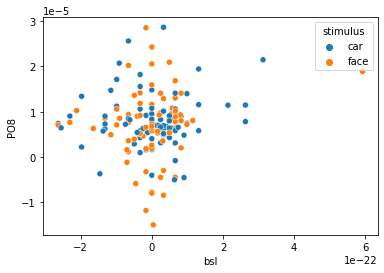

In [16]:
sns.scatterplot(x=d.bsl,y=d.PO8,hue=d.stimulus)

In [17]:
print(solve(ones,cond,stim,cond*stim,d.bsl))
print(solve(ones,cond,stim,cond*stim))
print(solve(ones,cond,stim,cond*stim,d.bsl,d.bsl*cond,d.bsl*stim,d.bsl*cond*stim))

[ 8.55198583e-06 -9.76306133e-07  5.20241415e-07 -3.07724204e-06
  7.92273056e+15]
[ 8.59637167e-06 -1.00442904e-06  3.95228075e-07 -2.90287999e-06]
[ 8.61971593e-06 -1.04572495e-06  4.88089910e-07 -3.08101060e-06
 -4.16687453e+15  1.29122878e+16  1.55856782e+16 -1.18670300e+16]


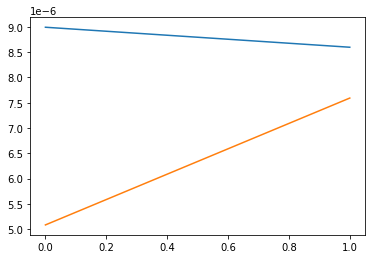

In [18]:
from matplotlib import pyplot as plt
plt.plot([0,1],[d.PO8[(d.condition=="scrambled") & (d.stimulus=="face")].mean(),d.PO8[(d.condition=="scrambled") & (d.stimulus=="car")].mean()])
plt.plot([0,1],[d.PO8[(d.condition=="intact") & (d.stimulus=="face")].mean(),d.PO8[(d.condition=="intact") & (d.stimulus=="car")].mean()])

investigate correlation

In [19]:
np.corrcoef(cond,stim*cond)

array([[1.        , 0.57735027],
       [0.57735027, 1.        ]])

<AxesSubplot:xlabel='cond', ylabel='est'>

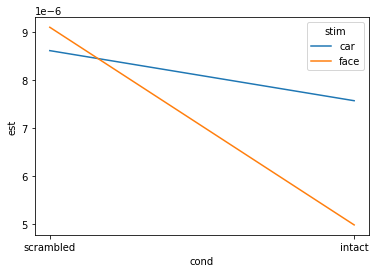

In [20]:
est = solve(ones,cond,stim,cond*stim,d.bsl,d.bsl*cond,d.bsl*stim,d.bsl*cond*stim)
res = pd.DataFrame({"stim":["car","car","face","face"],
              "cond":["scrambled","intact","scrambled","intact"],
              "est": [
                    1*est[0]+0*est[1] + 0*est[2] + 0*0*est[3],
                    1*est[0]+1*est[1] + 0*est[2] + 1*0*est[3],
                    1*est[0]+0*est[1] + 1*est[2] + 0*1*est[3],
                    1*est[0]+1*est[1] + 1*est[2] + 1*1*est[3]]})
sns.lineplot(x=res.cond,y=res.est,hue=res.stim)

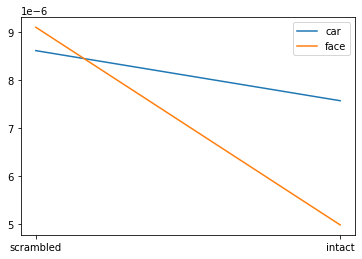

In [21]:
tbtmodel1 = solve(ones,cond,stim,cond*stim,d.bsl,d.bsl*cond,d.bsl*stim,d.bsl*cond*stim)
tbtmodel2 = solve(ones,cond,stim,cond*stim,d.bsl)
tbtmodel3 = solve(ones,cond,stim,cond*stim)

plt_corr(tbtmodel1)

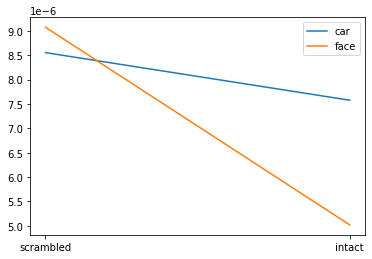

In [22]:
plt_corr(tbtmodel2)

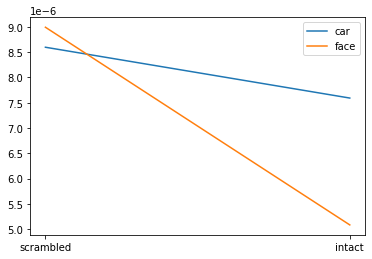

In [23]:
plt_corr(tbtmodel3)

plotting with standard error

In [24]:
def se_contrast(*args,c=[1,0,0,0]):
    c = np.array(c)
    X = np.stack(args).T
    b = np.linalg.inv(X.T @ X)@X.T@d.PO8
    e = d.PO8-X@b
    s = np.var(e)
    #print(np.sqrt(c.T @ np.linalg.inv(X.T @ X) @c))
    return np.sqrt(s * c.T @ np.linalg.inv(X.T @ X) @c)

<ErrorbarContainer object of 3 artists>

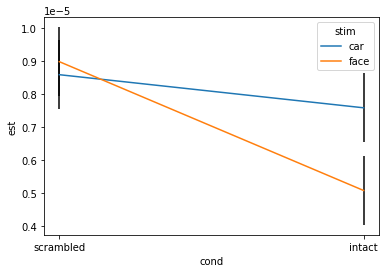

In [25]:
est = solve(ones,cond,stim,cond*stim)
res = pd.DataFrame({"stim":["car","car","face","face"],
              "cond":["scrambled","intact","scrambled","intact"],
              "est": [
                    est@np.array([1,0 ,0,0*0]),
                    est@np.array([1,1 ,0,1*0]),
                    est@np.array([1,0 ,1,0*1]),
                    est@np.array([1,1 ,1,1*1])],
               "se": [se_contrast(ones,cond,stim,cond*stim,c = [1,0,0,0]),
                     se_contrast(ones,cond,stim,cond*stim,c = [1,1,0,0]),
                     se_contrast(ones,cond,stim,cond*stim,c = [1,0,1,0]),
                     se_contrast(ones,cond,stim,cond*stim,c = [1,1,1,1])]})
sns.lineplot(x=res.cond,y=res.est,hue=res.stim)
plt.errorbar(x=res.cond,y=res.est,yerr=res.se,fmt="none",c = 'k')